**We implemented a quantum circuit simulator by defining circuits and basic gates (Hadamard, Pauli, CNOT), using matrix multiplication for gate operations. We simulated the evolution of quantum states, visualized them using the Bloch Sphere, simulated quantum measurements with probabilities, and explored randomized quantum circuits to demonstrate quantum randomness.**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [2]:
initial_state = np.array([1,0])

print('initial state |0⟩ : ' , initial_state )

initial state |0⟩ :  [1 0]


In [3]:
# Define the single-qubit gates
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])


In [4]:
print("Hadamard Gate:\n", H)
print("Pauli-X Gate:\n", X)
print("Pauli-Y Gate:\n", Y)
print("Pauli-Z Gate:\n", Z)

Hadamard Gate:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Pauli-X Gate:
 [[0 1]
 [1 0]]
Pauli-Y Gate:
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Pauli-Z Gate:
 [[ 1  0]
 [ 0 -1]]


In [5]:
# Define the multi-qubit gates
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

Toffoli = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1]])
print("CNOT Gate:\n", CNOT)


CNOT Gate:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [6]:
def apply_gate(state , gate):
  return np.dot(gate , state)

In [7]:
state_after_H = apply_gate(initial_state , H)
print("State after applying Hadamard Gate:\n", state_after_H)

State after applying Hadamard Gate:
 [0.70710678 0.70710678]


In [9]:
state_after_Pauli_X = apply_gate(initial_state , X)
print("State after applying Pauli-X Gate:\n", state_after_Pauli_X)

State after applying Pauli-X Gate:
 [0 1]


In [11]:
# Define a simple quantum circuit: Apply Hadamard followed by Pauli-X
state_after_circuit = apply_gate(initial_state , H)
state_after_circuit = apply_gate(state_after_circuit , X)

print("State after applying ( H -> X ):\n", state_after_circuit)

State after applying ( H -> X ):
 [0.70710678 0.70710678]


In [15]:
# Apply Hadamard, then CNOT
initial_state_two_qubits = np.array([1,0,0,0])
state_after_H = apply_gate(initial_state_two_qubits , np.kron(H , np.eye(2)))
state_after_CNOT = apply_gate(state_after_H , CNOT)

print("State after applying ( H -> CNOT ):\n", state_after_CNOT)

State after applying ( H -> CNOT ):
 [0.70710678 0.         0.         0.70710678]


In [18]:
# Apply Hadamard gate on |0⟩ (superposition)
state_superposition = apply_gate(initial_state_two_qubits, np.kron(H, np.eye(2)))
print("Superposition state after Hadamard:", state_superposition)

Superposition state after Hadamard: [0.70710678 0.         0.70710678 0.        ]


In [20]:
# Bell state (entanglement): Apply CNOT after Hadamard
state_bell = apply_gate(state_superposition, CNOT)  # Apply CNOT on 2-qubits
print("Bell state:", state_bell)

Bell state: [0.70710678 0.         0.         0.70710678]


In [24]:
def bloch_vector(state):
  theta = 2*np.arccos(np.abs(state[0])) # Polar angle
  phi = np.angle(state[1]) # Azimuthal angle
  return theta , phi


def plot_bloch_sphere(state):
  theta , phi = bloch_vector(state)
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')

  # Spherical to Cartesian conversion
  X = np.sin(theta)*np.cos(phi)
  Y = np.sin(theta)*np.sin(phi)
  Z = np.cos(theta)

  ax.quiver(0,0,0,X,Y,Z,color='b',arrow_length_ratio=0.1 , label = 'Qubit State')


  u = np.linspace(0, 2 * np.pi, 100)
  v = np.linspace(0, np.pi, 100)
  x = np.outer(np.cos(u), np.sin(v))
  y = np.outer(np.sin(u), np.sin(v))
  z = np.outer(np.ones(np.size(u)), np.cos(v))

  ax.plot_surface(x, y, z, color='r', alpha=0.5, label='Sphere')

   # Labels and settings
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title("Bloch Sphere")

  plt.show()

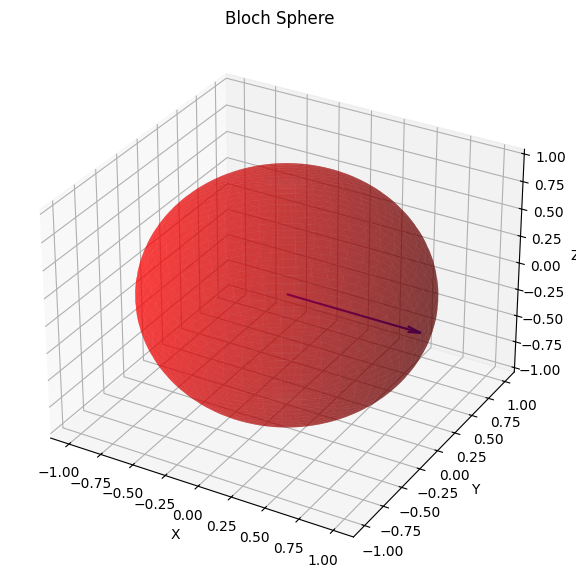

In [27]:
plot_bloch_sphere(state_bell)

In [34]:
# Define function to apply a series of gates on a qubit
def apply_circuit(state, gates):
    for gate in gates:
        state = np.dot(gate, state)
    return state

# Simulate quantum measurement
def measure(state):
    probabilities = np.abs(state)**2  # Probability of each outcome (0 or 1)
    measurement_outcome = random.choices([0, 1], probabilities)[0]
    # After measurement, collapse the state to the corresponding outcome
    if measurement_outcome == 0:
        state = np.array([1, 0])  # Collapse to |0⟩
    else:
        state = np.array([0, 1])  # Collapse to |1⟩
    return state, measurement_outcome, probabilities

# Example circuit: Hadamard -> Pauli-X -> Measurement
initial_state = np.array([1, 0])  # Start with |0⟩

# Define a simple sequence of gates
gates = [H, X]  # Apply Hadamard then Pauli-X
final_state = apply_circuit(initial_state, gates)
collapsed_state, measurement, probs = measure(final_state)

print("Final state after gates:", final_state)
print("Measurement outcome:", measurement)
print("Measurement probabilities:", probs)


Final state after gates: [0.70710678 0.70710678]
Measurement outcome: 1
Measurement probabilities: [0.5 0.5]


In [38]:
def random_circuit(num_gates):
    gates_list = [H, X, Y, Z]
    circuit = []
    for _ in range(num_gates):
        gate = random.choice(gates_list)  # Choose a random gate
        circuit.append(gate)
    return circuit

# Simulate a random quantum circuit with 5 random gates
random_circuit_gates = random_circuit(5)
print("Random Circuit Gates:", random_circuit_gates)

# Apply the random circuit to the initial state and measure
final_state_random = apply_circuit(initial_state, random_circuit_gates)
collapsed_state_random, measurement_random, probs_random = measure(final_state_random)

print("Final state after random circuit:", final_state_random)
print("Measurement outcome:", measurement_random)
print("Measurement probabilities:", probs_random)


Random Circuit Gates: [array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), array([[ 1,  0],
       [ 0, -1]]), array([[0, 1],
       [1, 0]])]
Final state after random circuit: [-0.70710678  0.70710678]
Measurement outcome: 1
Measurement probabilities: [0.5 0.5]
